<a href="https://colab.research.google.com/github/LokeRuiKee/machine-learning-december/blob/main/Traffic_light_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import os
import glob
from IPython.display import Image, display

In [ ]:
# check access to GPU
!nvidia-smi

Sat Dec 16 09:10:11 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# install YOLOv8 from source
!git clone https://github.com/ultralytics/ultralytics.git

Cloning into 'ultralytics'...
remote: Enumerating objects: 21276, done.
remote: Counting objects: 100% (531/531), done.
remote: Compressing objects: 100% (241/241), done.
remote: Total 21276 (delta 378), reused 409 (delta 289), pack-reused 20745
Receiving objects: 100% (21276/21276), 11.33 MiB | 19.47 MiB/s, done.
Resolving deltas: 100% (15028/15028), done.


In [ ]:
# set our current directory to ultralytics directory
%cd {HOME}/ultralytics

/content/ultralytics


In [ ]:
# install dependencies
!pip install -e '.[dev]'

Obtaining file:///content/ultralytics
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.0/229.0 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 45.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 63.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.1/241.1 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# check if YOLOv8 is installed and is working fine
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [ ]:
# set detect folder to our current directory

HOME ='/content/ultralytics/ultralytics/models/yolo/detect'
%cd {HOME}

/content/ultralytics/ultralytics/models/yolo/detect


In [ ]:
# import dataset
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9WvjyTT7vwAmv6eZCHVv")
project = rf.workspace("wawan-pradana").project("cinta_v2")
dataset = project.version(1).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 977.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 2.3 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninsta

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.227, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to cinTA_v2-1 in yolov8:: 100%|██████████| 4806/4806 [00:00<00:00, 6140.81it/s]


# train the YOLOv8 model on the dataset

In [ ]:
%cd {HOME}

/content/ultralytics/ultralytics/models/yolo/detect


In [ ]:
%cd {dataset.location}

/content/ultralytics/ultralytics/models/yolo/detect/cinTA_v2-1


In [ ]:
#%cd {HOME}
#!python train.py model=yolov8l.pt data={dataset.location}/data.yaml epochs=80 imgsz=640

In [ ]:
from ultralytics import YOLO
# Load a model
model = YOLO('yolov8l.pt')

dataset = '/content/ultralytics/ultralytics/models/yolo/detect/cinTA_v2-1/data.yaml'

# Train the model with 2 GPUs
results = model.train(data='/content/ultralytics/ultralytics/models/yolo/detect/cinTA_v2-1/data.yaml', epochs=25, imgsz=640)

100%|██████████| 83.7M/83.7M [00:00<00:00, 171MB/s]


Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/ultralytics/ultralytics/models/yolo/detect/cinTA_v2-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, 

100%|██████████| 6.23M/6.23M [00:00<00:00, 76.5MB/s]


AMP: checks passed ✅


train: Scanning /content/ultralytics/ultralytics/models/yolo/detect/cinTA_v2-1/train/labels.cache... 2097 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2097/2097 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/ultralytics/ultralytics/models/yolo/detect/cinTA_v2-1/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]


Plotting labels to /content/ultralytics/runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/ultralytics/runs/detect/train4
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      10.8G      1.602      2.527      1.662          1        640: 100%|██████████| 132/132 [01:47<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.32it/s]

                   all        200        272    0.00642      0.383    0.00471    0.00208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      11.2G      1.715      2.029       1.75          2        640: 100%|██████████| 132/132 [01:47<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        200        272       0.31      0.189        0.2     0.0596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      11.2G      1.684      2.003      1.741          1        640: 100%|██████████| 132/132 [01:45<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.35it/s]

                   all        200        272      0.277      0.371       0.32       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      11.2G      1.609      1.817      1.694          1        640: 100%|██████████| 132/132 [01:45<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.43it/s]

                   all        200        272      0.309       0.64      0.485      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      11.2G      1.591      1.681      1.688          2        640: 100%|██████████| 132/132 [01:46<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        200        272      0.395      0.678      0.615      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      11.2G      1.574      1.571      1.669          1        640: 100%|██████████| 132/132 [01:45<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        200        272      0.668      0.514      0.489      0.143



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      11.2G      1.514      1.478      1.606          3        640: 100%|██████████| 132/132 [01:45<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.48it/s]

                   all        200        272      0.806      0.528       0.63      0.207



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      11.3G      1.491      1.423      1.606          5        640: 100%|██████████| 132/132 [01:45<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]

                   all        200        272      0.579      0.729      0.768      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      11.2G      1.451      1.332      1.577          3        640: 100%|██████████| 132/132 [01:47<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]

                   all        200        272        0.7      0.715      0.777      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      11.2G      1.461      1.325      1.587          1        640: 100%|██████████| 132/132 [01:45<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        200        272      0.693      0.704      0.777      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      11.2G      1.407       1.23      1.546          1        640: 100%|██████████| 132/132 [01:46<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        200        272      0.705      0.854      0.835      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      11.2G      1.428      1.213      1.562          2        640: 100%|██████████| 132/132 [01:46<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]

                   all        200        272      0.836      0.785      0.896      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      11.2G      1.406      1.147      1.555          2        640: 100%|██████████| 132/132 [01:47<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]

                   all        200        272      0.901      0.783      0.898      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      11.2G      1.376      1.099      1.526          3        640: 100%|██████████| 132/132 [01:45<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.52it/s]

                   all        200        272      0.857      0.897      0.964      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      11.2G      1.356      1.053      1.493          6        640: 100%|██████████| 132/132 [01:47<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]

                   all        200        272      0.906      0.908      0.965      0.407


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      11.2G        1.3     0.8754      1.493          2        640: 100%|██████████| 132/132 [01:47<00:00,  1.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]

                   all        200        272      0.911      0.948      0.976      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      11.2G       1.28     0.8309      1.486          1        640: 100%|██████████| 132/132 [01:43<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        200        272      0.945      0.895      0.973      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      11.2G      1.257     0.7914      1.454          1        640: 100%|██████████| 132/132 [01:43<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]

                   all        200        272      0.937      0.933      0.974      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      11.2G      1.236     0.7722      1.442          1        640: 100%|██████████| 132/132 [01:44<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.58it/s]

                   all        200        272      0.937        0.9      0.959      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      11.2G      1.219     0.7616      1.427          1        640: 100%|██████████| 132/132 [01:44<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]

                   all        200        272      0.941       0.96      0.982       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      11.2G      1.224     0.7142       1.42          2        640: 100%|██████████| 132/132 [01:43<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        200        272      0.957      0.942      0.977      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      11.2G      1.191     0.7012      1.413          1        640: 100%|██████████| 132/132 [01:45<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        200        272       0.95      0.951       0.98      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      11.2G      1.185     0.6825      1.397          1        640: 100%|██████████| 132/132 [01:45<00:00,  1.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        200        272      0.951      0.952      0.983      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      11.2G      1.144     0.6512      1.368          1        640: 100%|██████████| 132/132 [01:46<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.53it/s]

                   all        200        272      0.972      0.952      0.983      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      11.2G      1.112     0.6175      1.343          1        640: 100%|██████████| 132/132 [01:46<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.28it/s]

                   all        200        272      0.953      0.965      0.984      0.495



25 epochs completed in 0.831 hours.
Optimizer stripped from /content/ultralytics/runs/detect/train4/weights/last.pt, 87.7MB
Optimizer stripped from /content/ultralytics/runs/detect/train4/weights/best.pt, 87.6MB

Validating /content/ultralytics/runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:11<00:00,  1.66s/it]


                   all        200        272      0.857      0.897      0.964      0.514
                 green        200         92       0.82      0.924      0.954      0.515
                   red        200        155      0.874      0.968       0.98      0.513
                yellow        200         25      0.878        0.8      0.958      0.514
Speed: 0.7ms preprocess, 18.1ms inference, 0.0ms loss, 8.8ms postprocess per image
Results saved to /content/ultralytics/runs/detect/train4


In [ ]:
# after the training is finished, a line similar to "Results saved to /content/ultralytics/runs/detect/train3" is expected

In [ ]:
# a quick fix to 'NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968'
# the error comes out when trying to run !ls and !python
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!ls /content/ultralytics/runs/detect/train4

args.yaml					   R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			   results.csv		val_batch0_pred.jpg
confusion_matrix.png				   results.png		val_batch1_labels.jpg
events.out.tfevents.1702722148.99b81f547e93.423.1  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					   train_batch1980.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				   train_batch1981.jpg	val_batch2_pred.jpg
labels.jpg					   train_batch1982.jpg	weights
P_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch2.jpg


# Displaying the Confusion Matrix

/content/ultralytics/ultralytics/models/yolo/detect


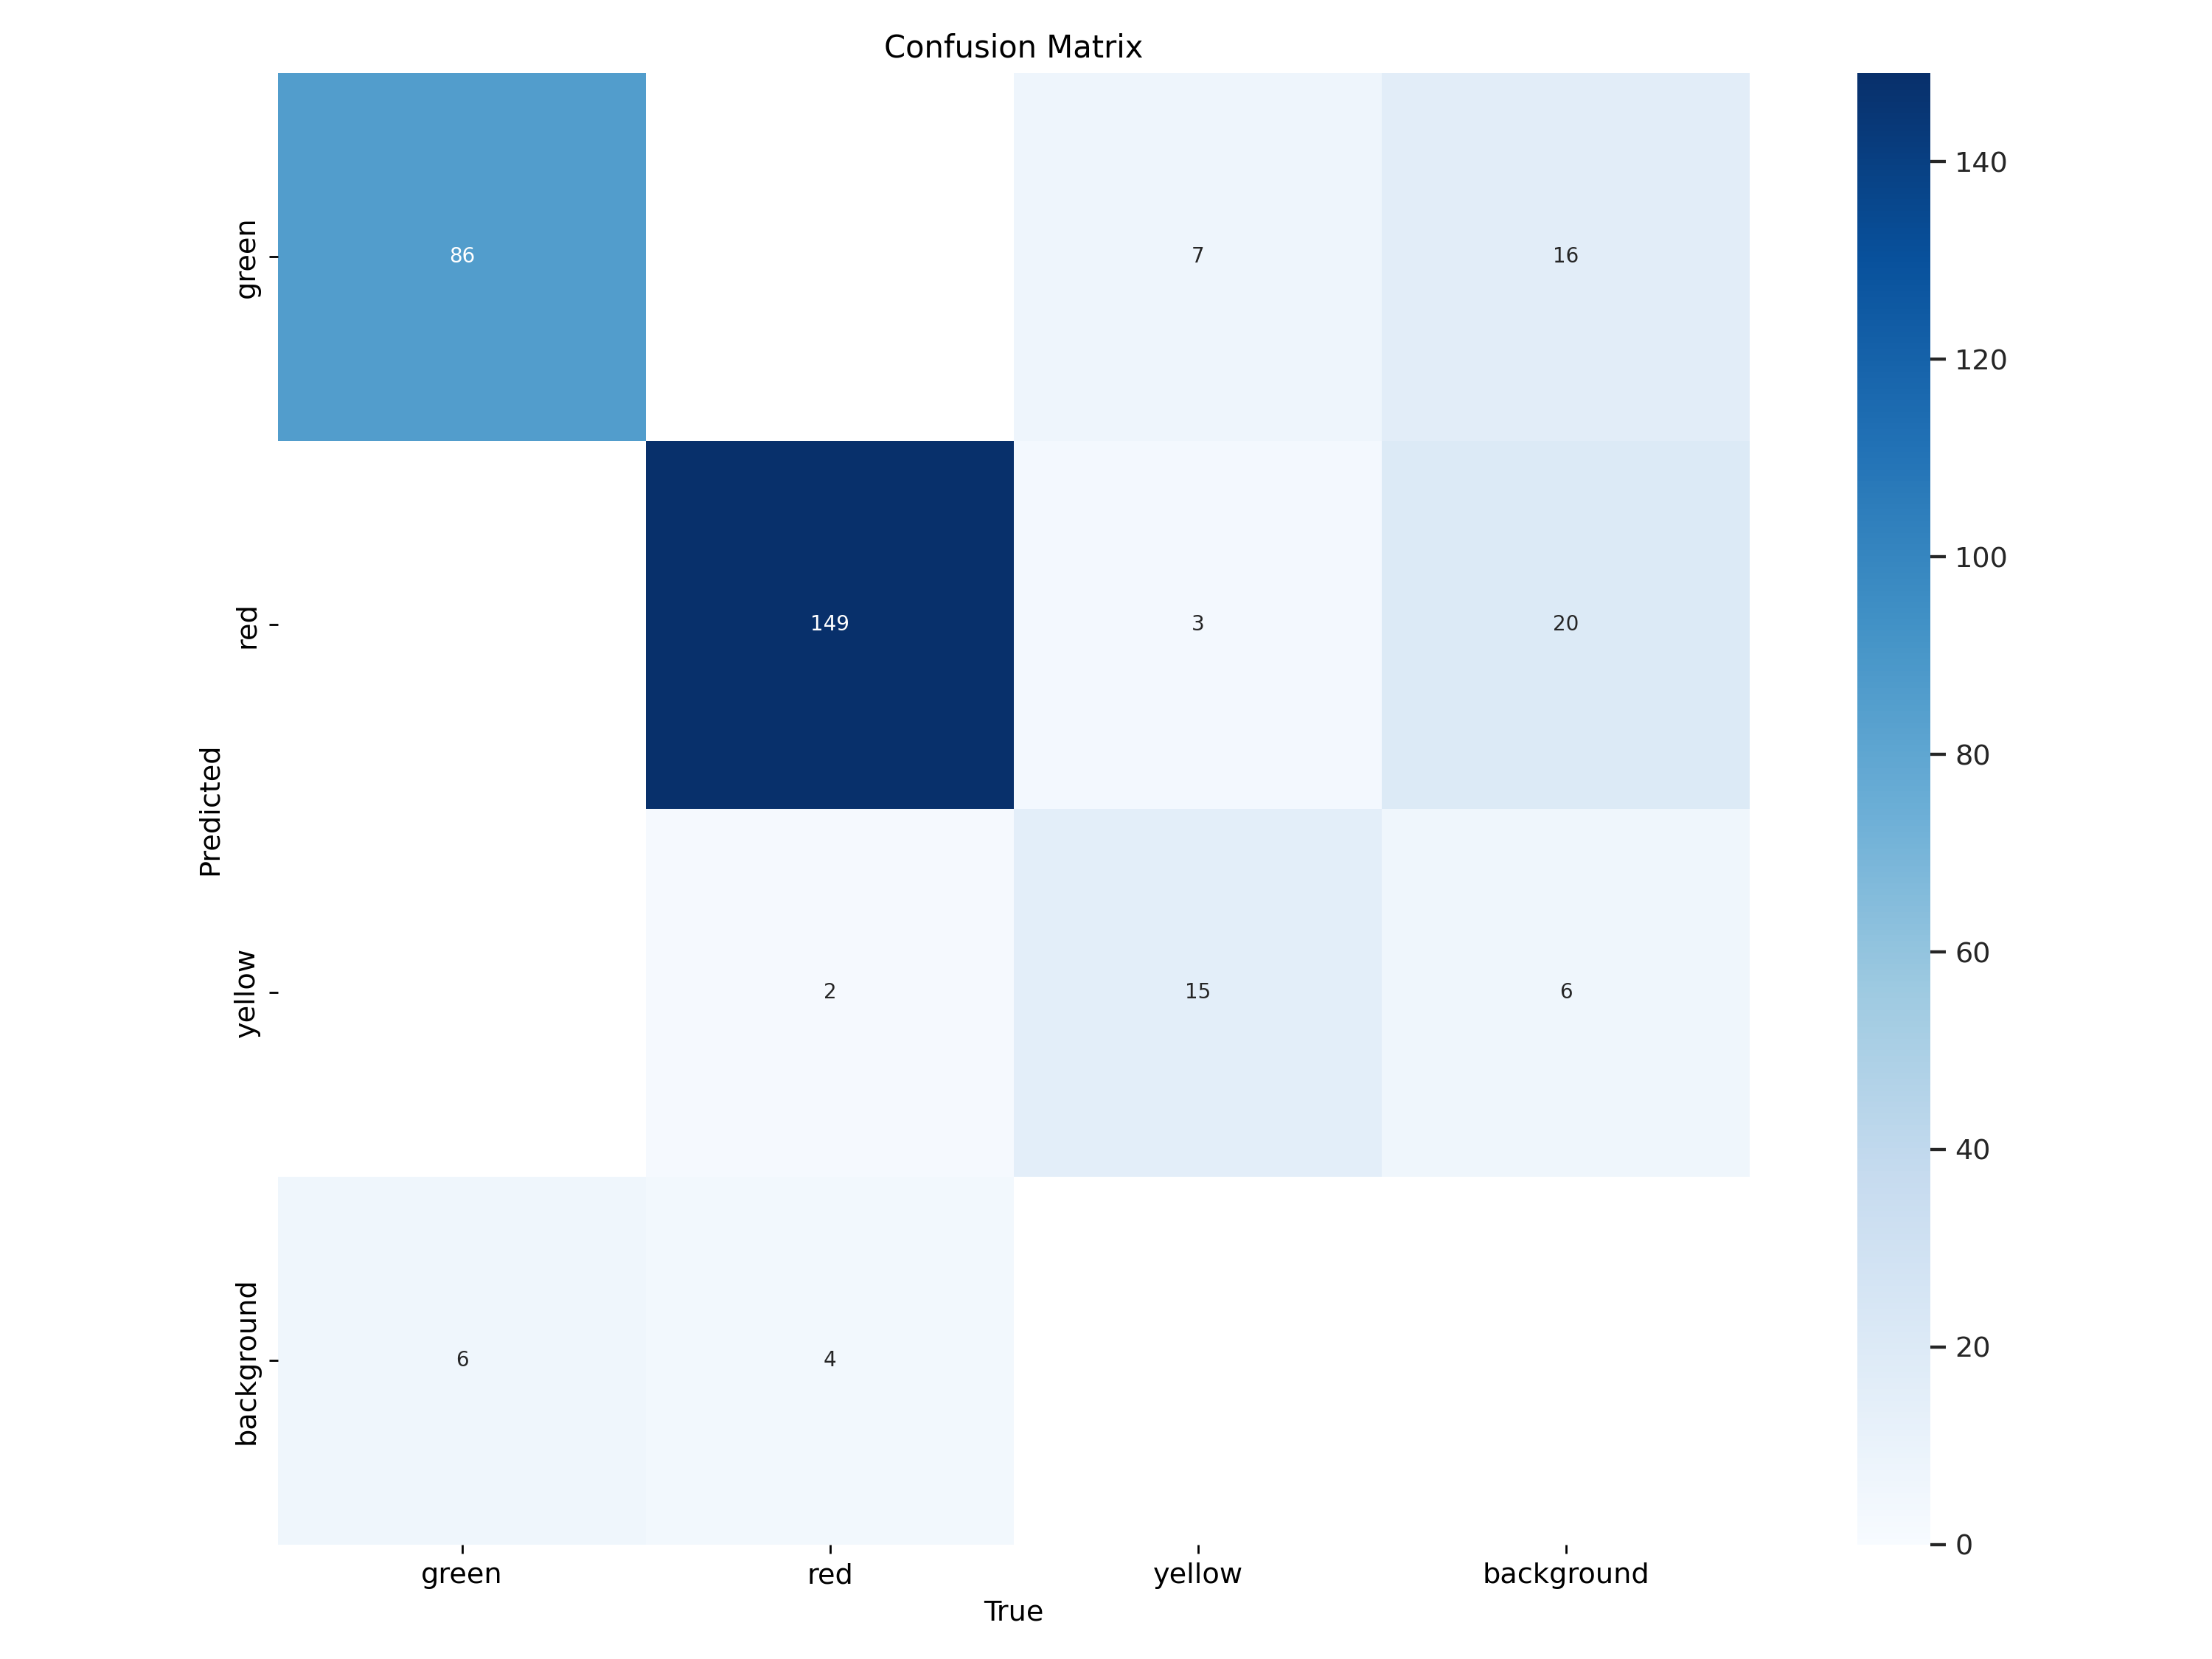

In [ ]:
%cd {HOME}
Image(filename=f'/content/ultralytics/runs/detect/train4/confusion_matrix.png', width=900)

/content/ultralytics/ultralytics/models/yolo/detect


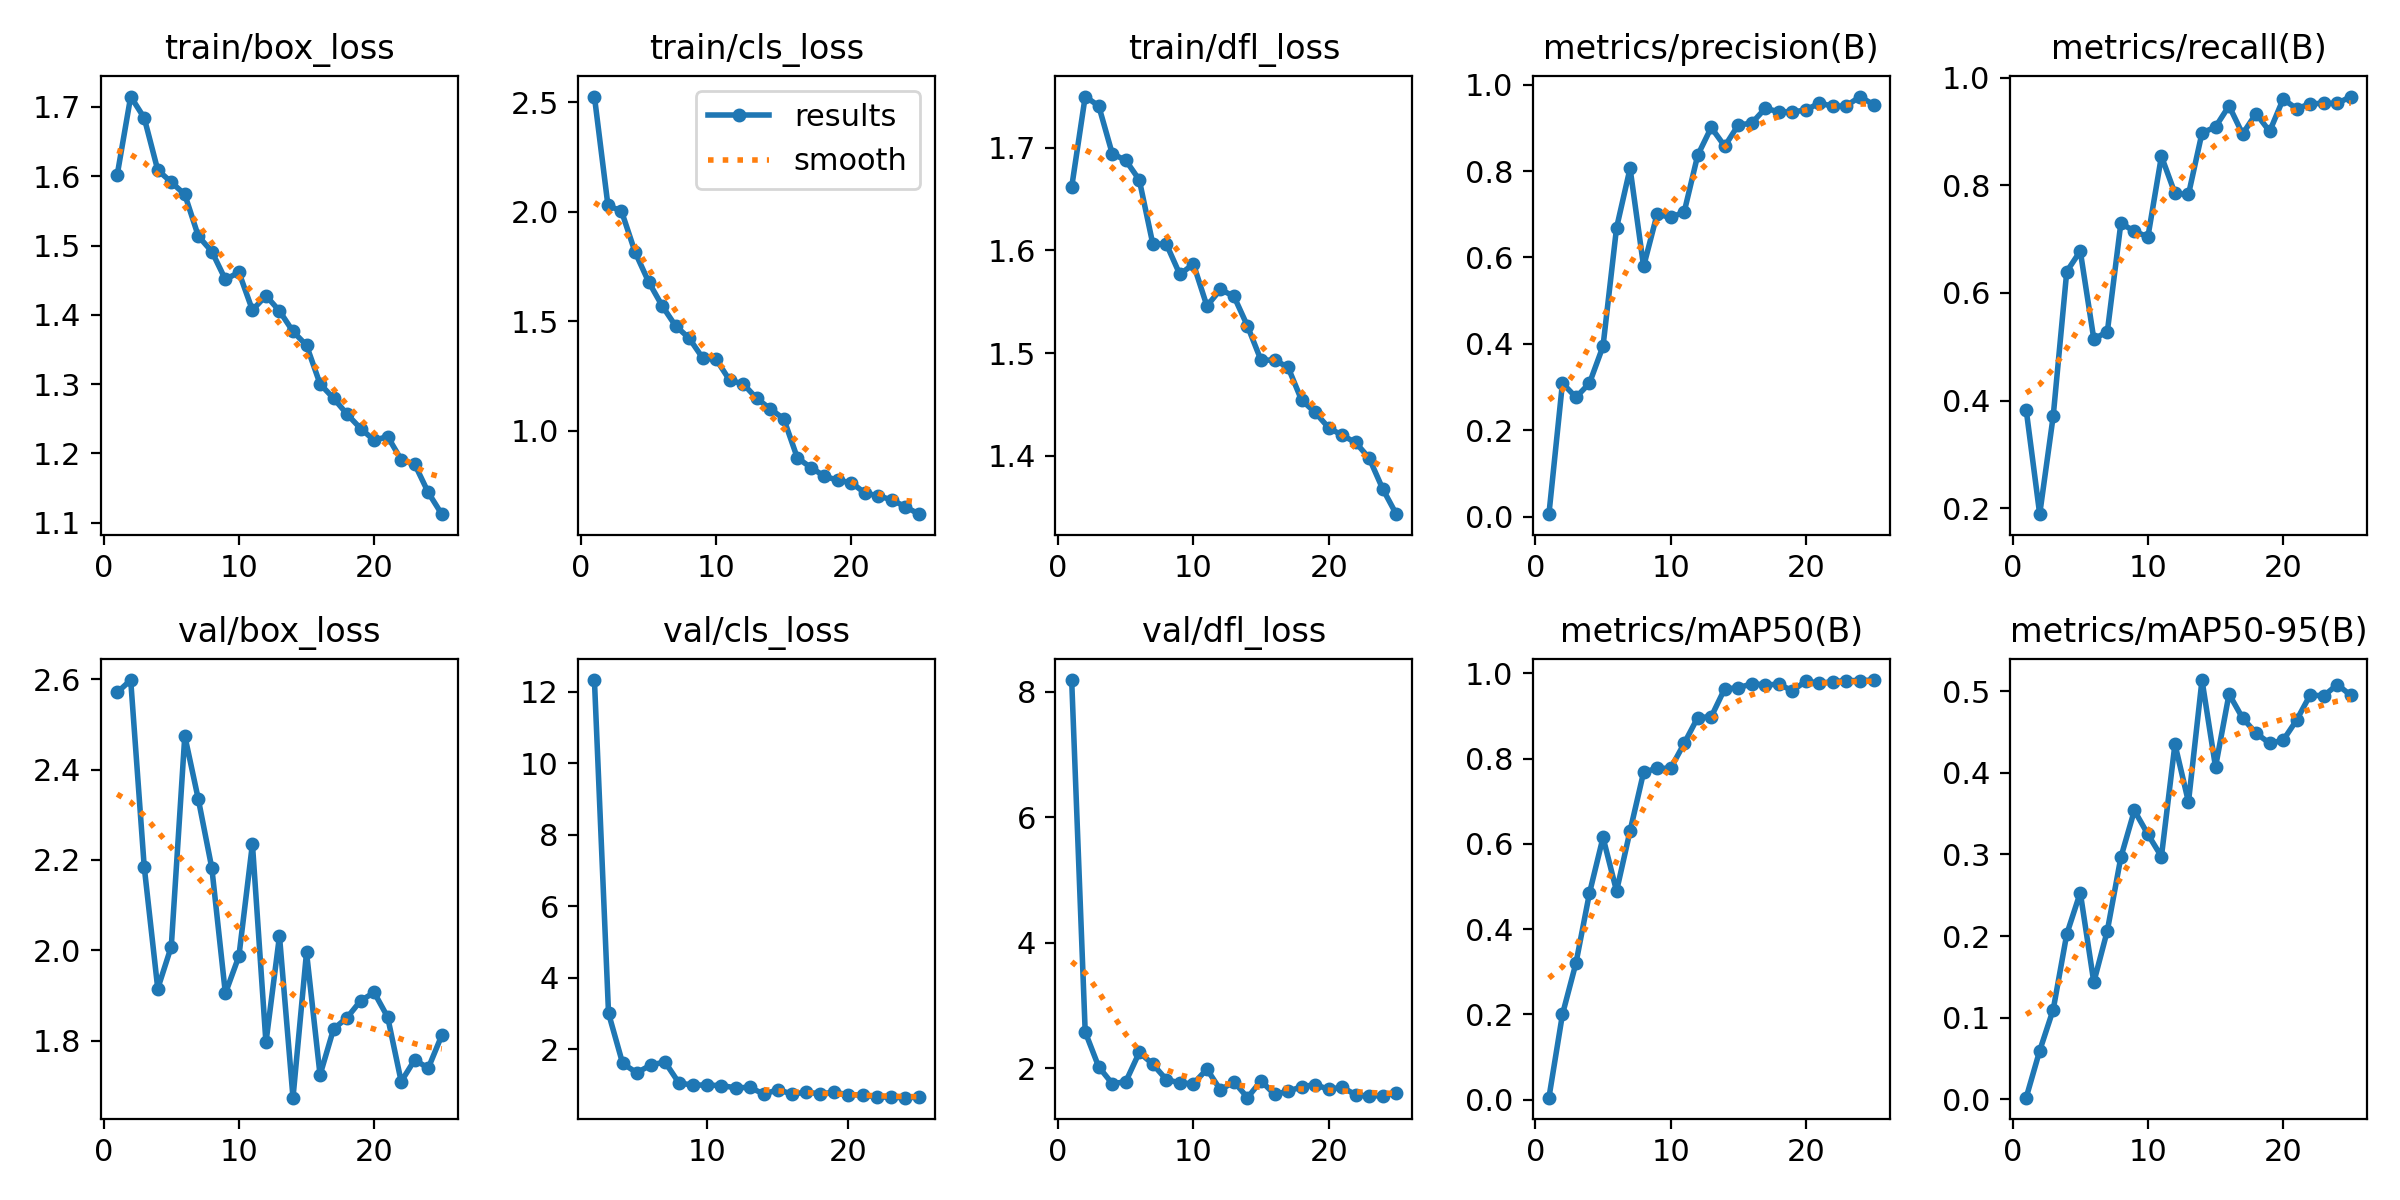

In [ ]:
%cd {HOME}
Image(filename=f'/content/ultralytics/runs/detect/train4/results.png', width=900)

/content/ultralytics/ultralytics/models/yolo/detect


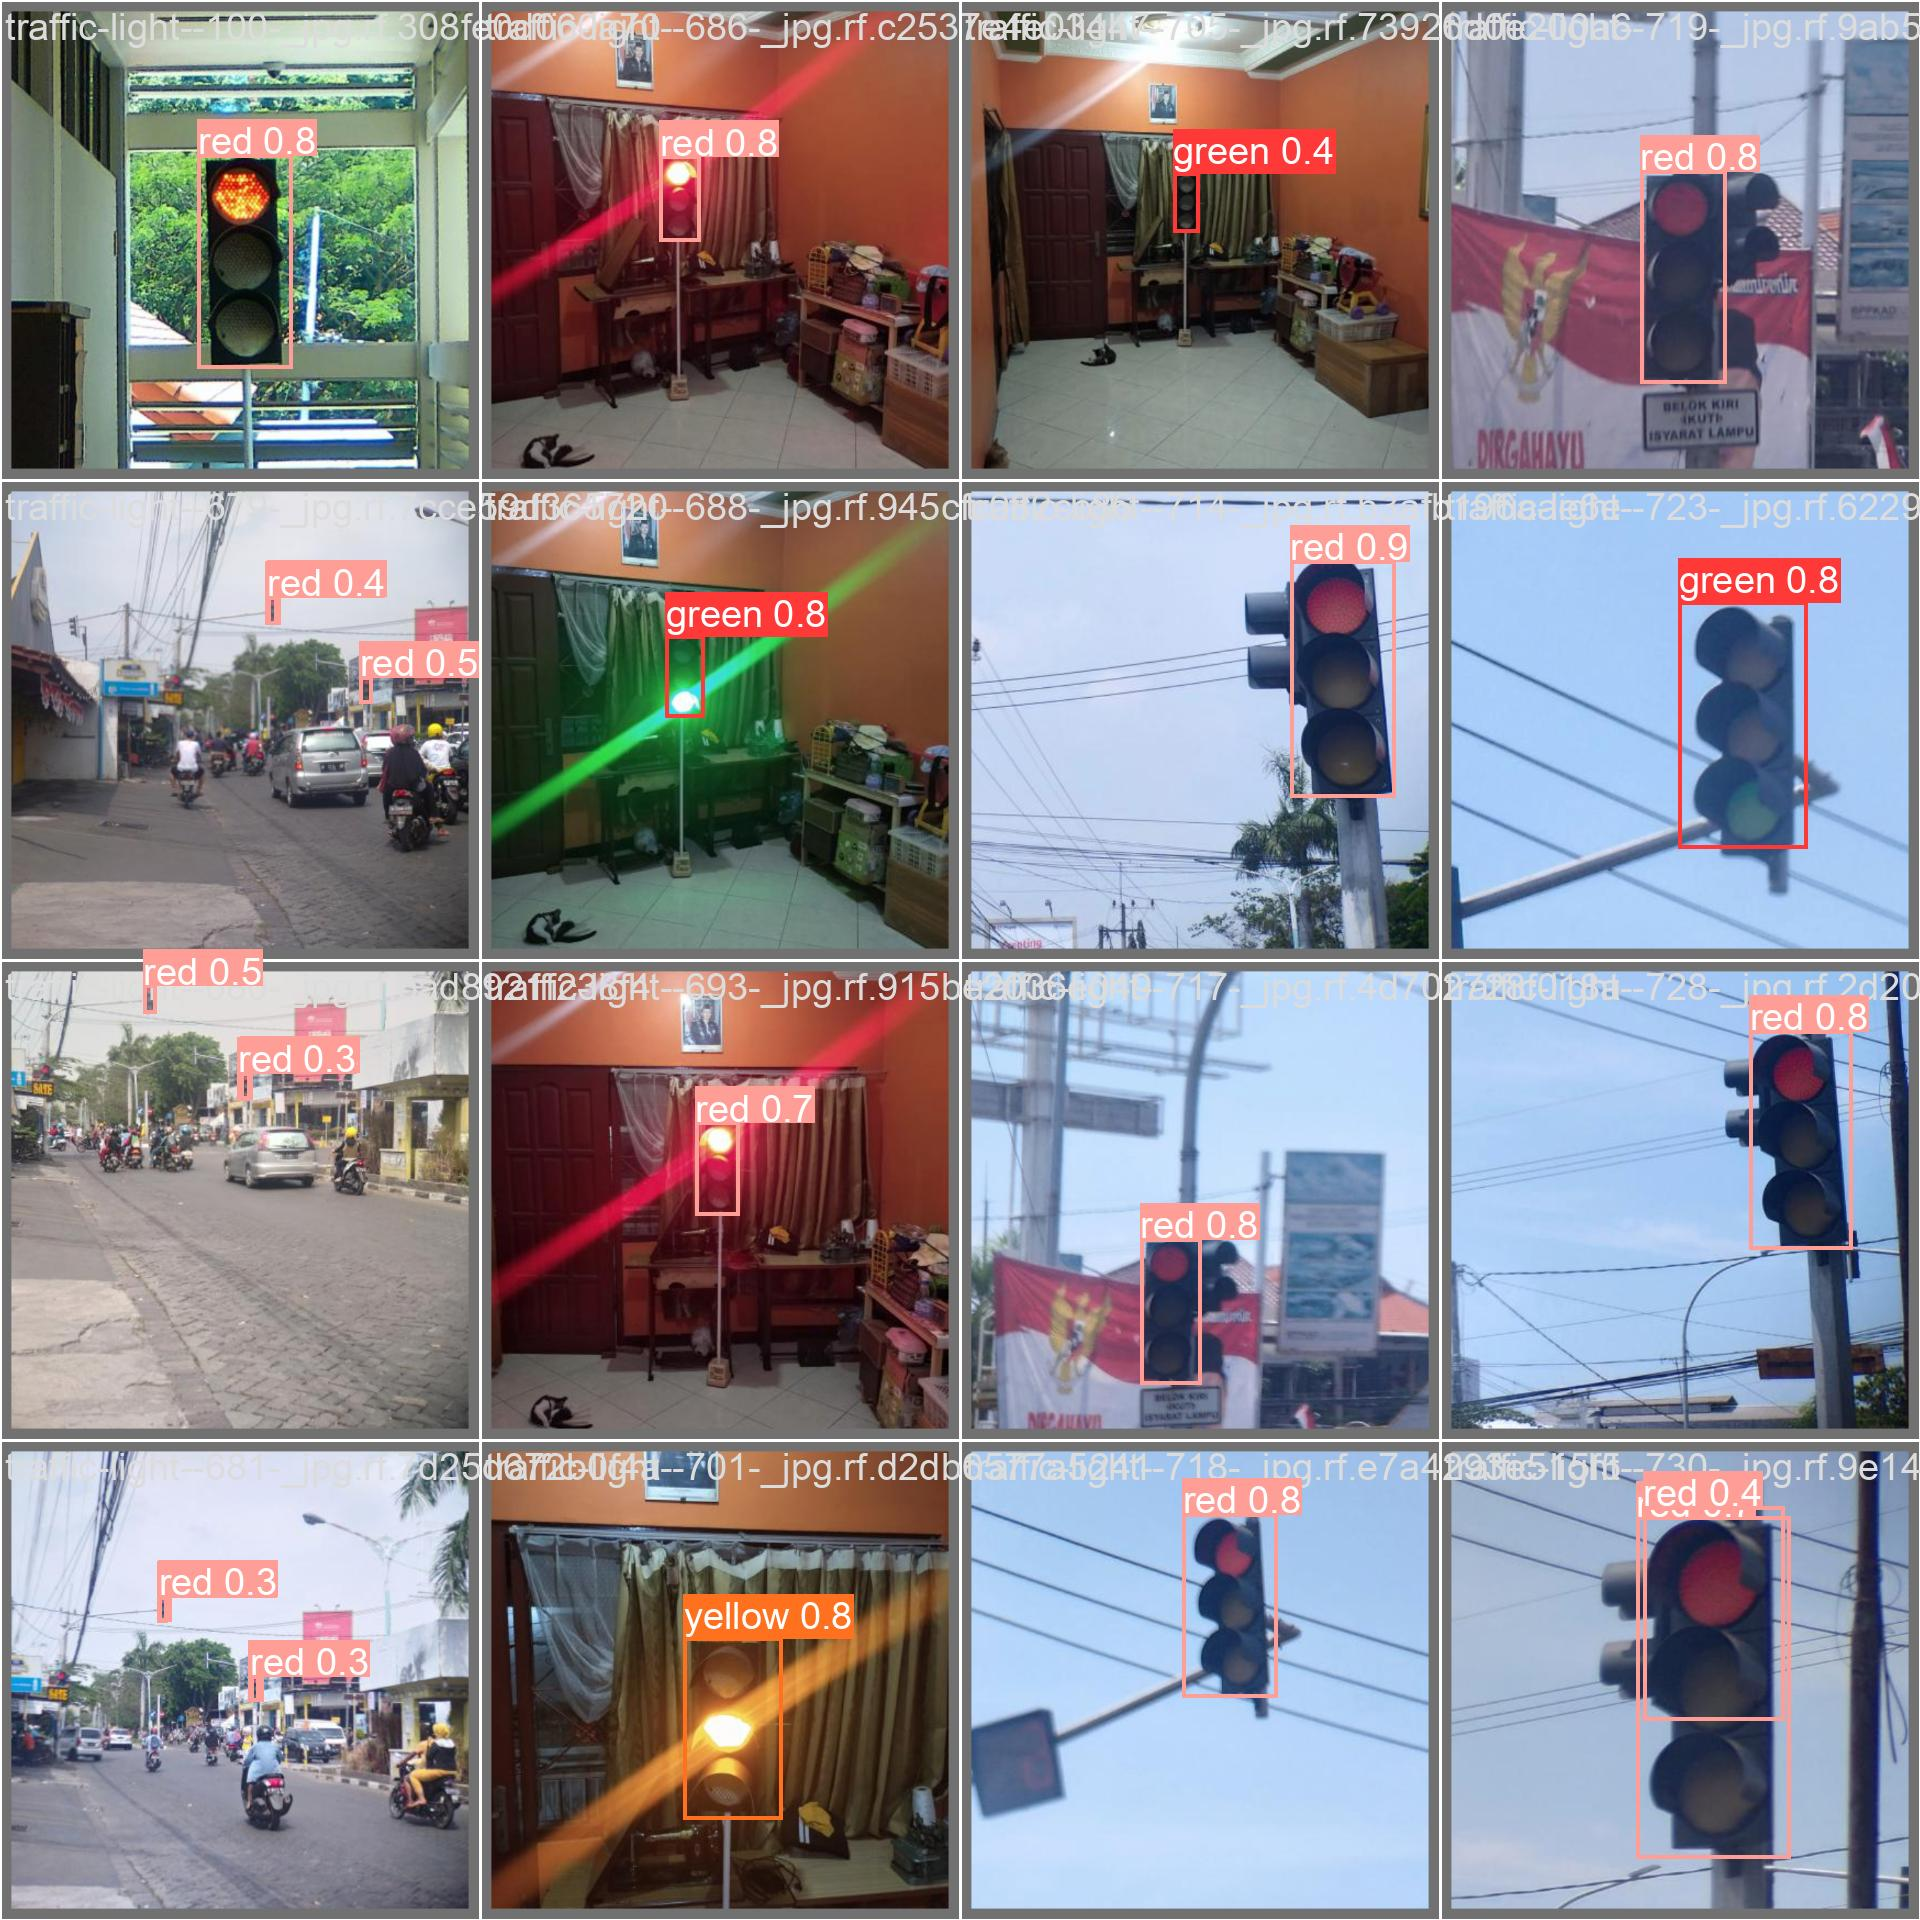

In [ ]:
%cd {HOME}
Image(filename=f'/content/ultralytics/runs/detect/train4/val_batch0_pred.jpg', width=600)

# Validate Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model='/content/ultralytics/runs/detect/train4/weights/best.pt' data = '/content/ultralytics/ultralytics/models/yolo/detect/cinTA_v2-1/data.yaml'

/content/ultralytics/ultralytics/models/yolo/detect
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /content/ultralytics/ultralytics/models/yolo/detect/cinTA_v2-1/valid/labels.cache... 200 images, 0 backgrounds, 0 corrupt: 100% 200/200 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:12<00:00,  1.02it/s]
                   all        200        272      0.859      0.897      0.964      0.516
                 green        200         92      0.819      0.924      0.954      0.517
                   red        200        155       0.88      0.968       0.98      0.512
                yellow        200         25      0.879        0.8      0.958      0.518
Speed: 4.5ms preprocess, 36.1ms inference, 0.0ms loss, 7.8ms postprocess per image
Results saved to /content/ultralytics/runs/det

# Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model='/content/ultralytics/runs/detect/train4/weights/best.pt' source='/content/ultralytics/ultralytics/models/yolo/detect/cinTA_v2-1/test/images'

/content/ultralytics/ultralytics/models/yolo/detect
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/100 /content/ultralytics/ultralytics/models/yolo/detect/cinTA_v2-1/test/images/traffic-light--119-_jpg.rf.65198e341a15fa6a0ba8be43a289c5f2.jpg: 640x640 1 green, 1 yellow, 60.4ms
image 2/100 /content/ultralytics/ultralytics/models/yolo/detect/cinTA_v2-1/test/images/traffic-light--122-_jpg.rf.63cb9e27085f500f6936833c196db2b8.jpg: 640x640 1 green, 47.3ms
image 3/100 /content/ultralytics/ultralytics/models/yolo/detect/cinTA_v2-1/test/images/traffic-light--128-_jpg.rf.a6747dec0b2c37a87c352aaca5903f4b.jpg: 640x640 2 reds, 47.2ms
image 4/100 /content/ultralytics/ultralytics/models/yolo/detect/cinTA_v2-1/test/images/traffic-light--134-_jpg.rf.3d82c581d4357d7e702169962004d148.jpg: 640x640 1 green, 41.5ms
image 5/100 /content/u

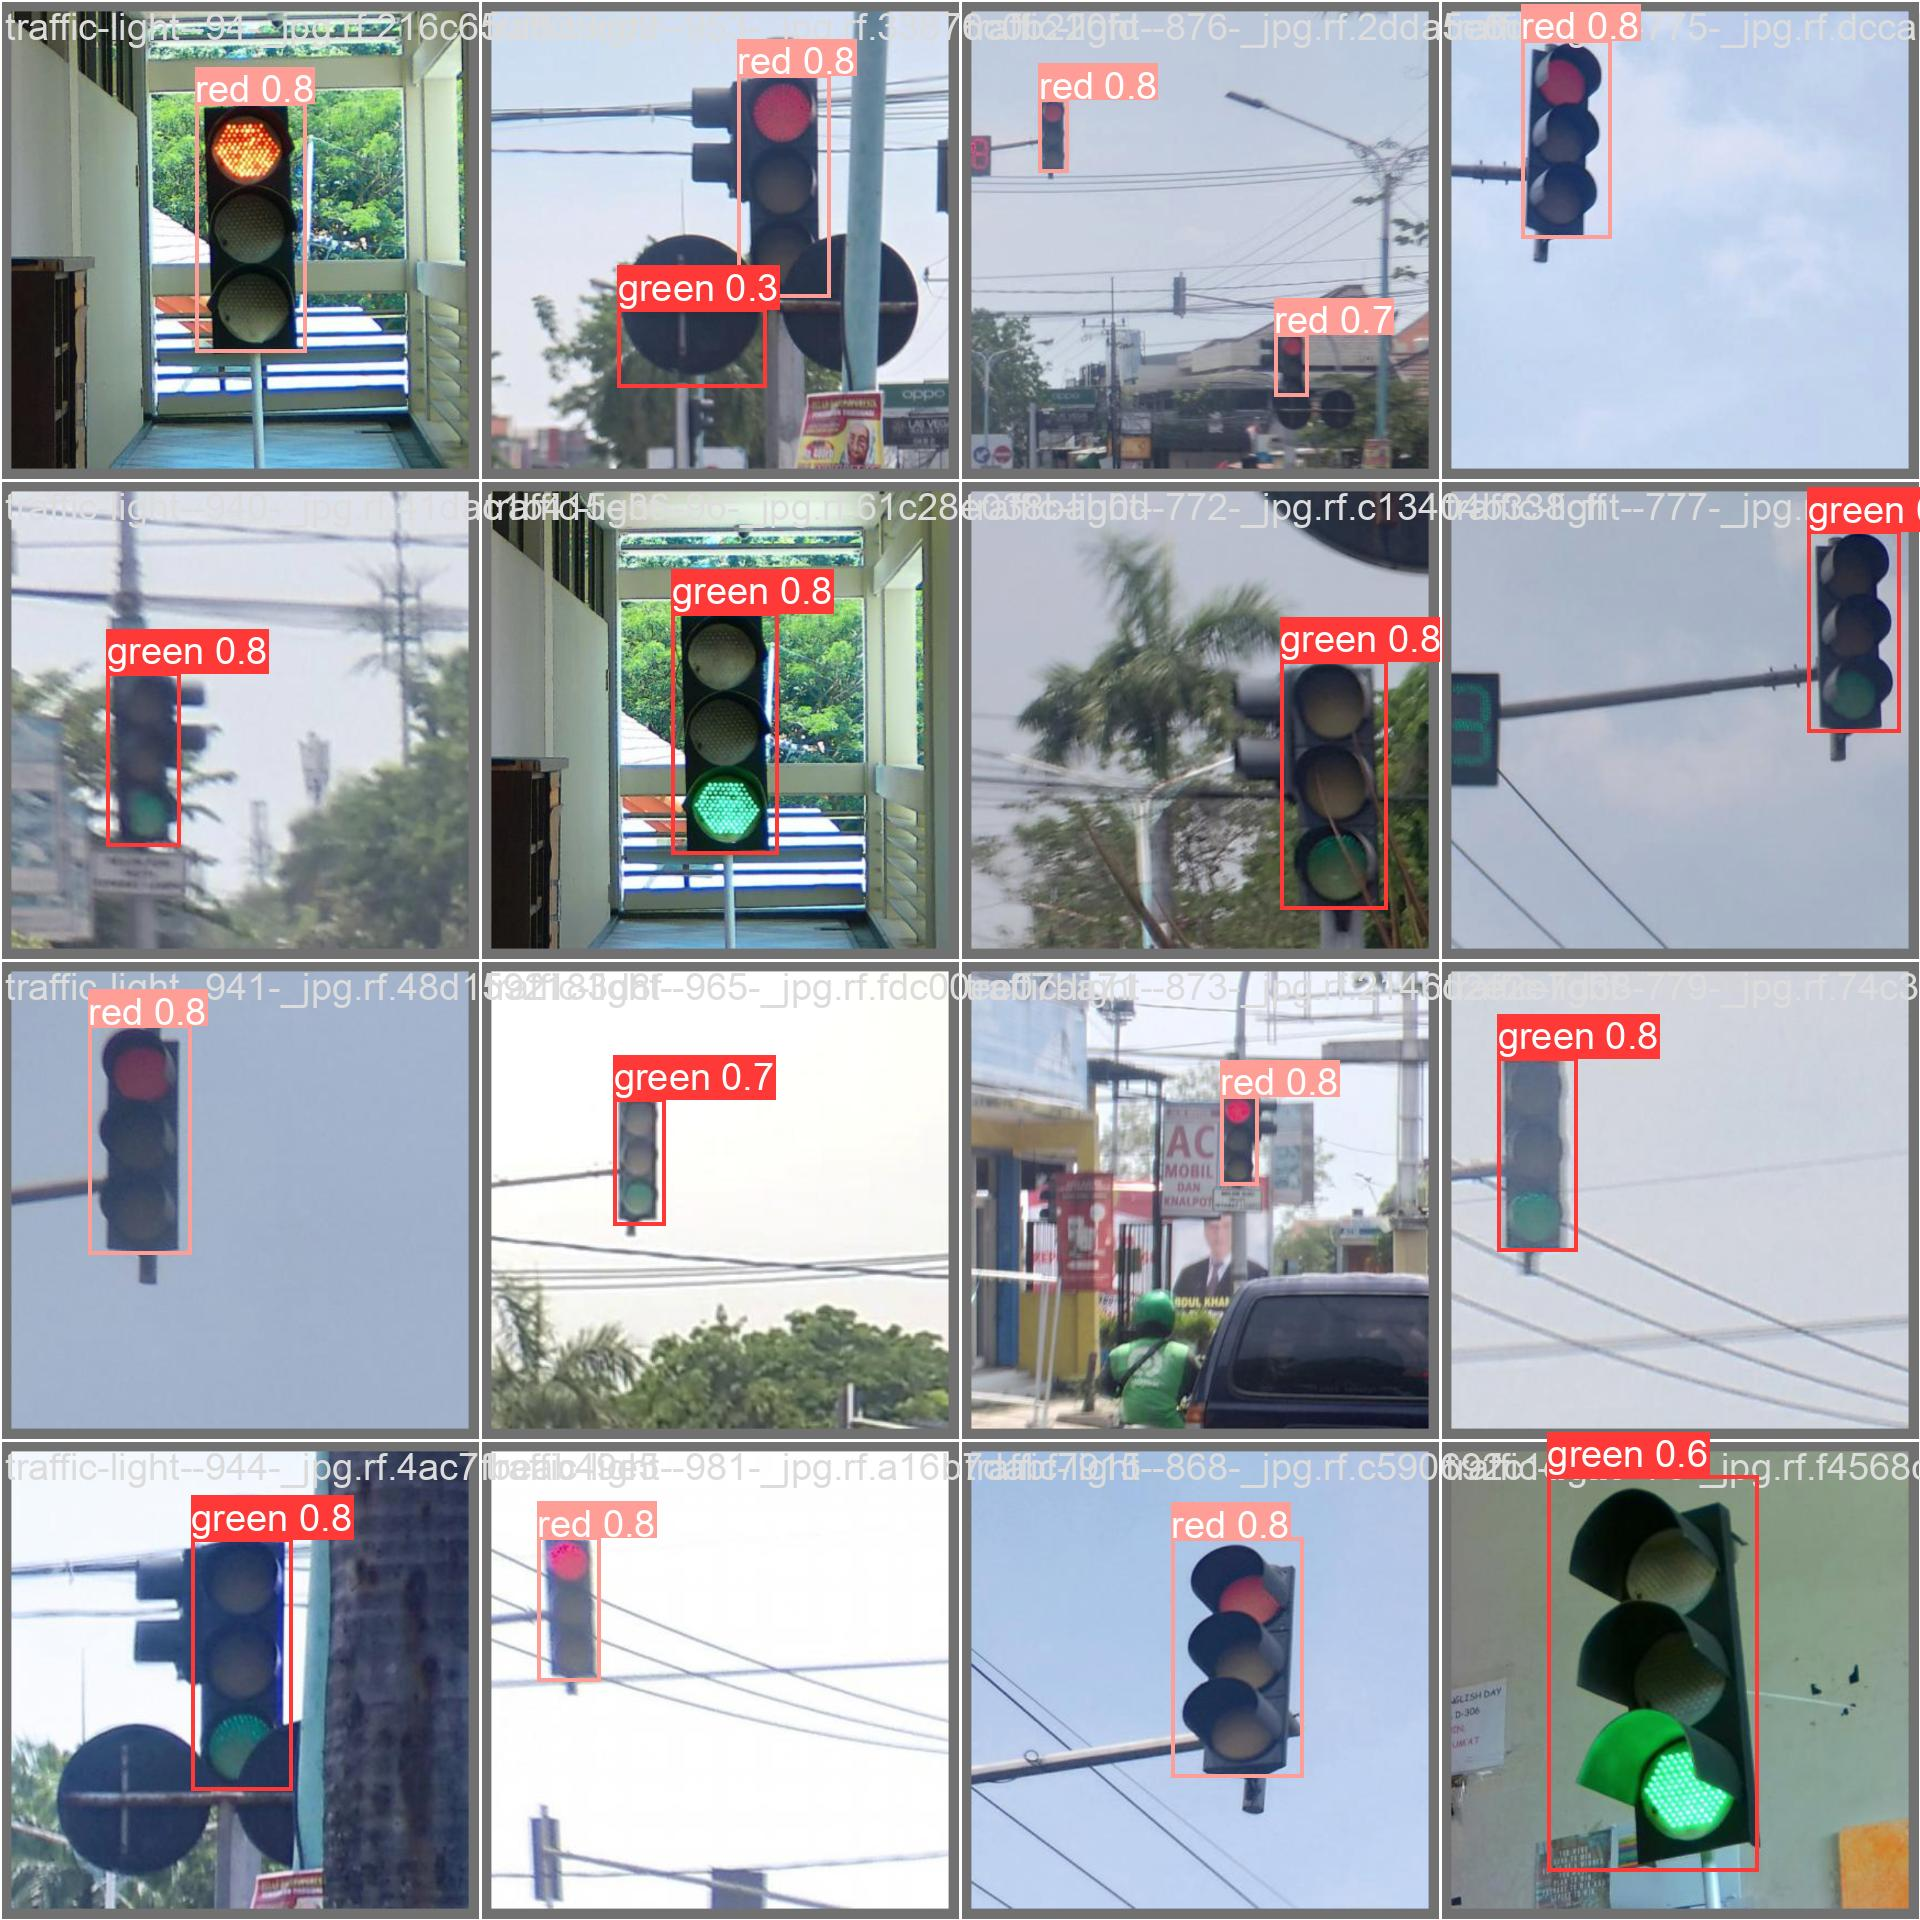

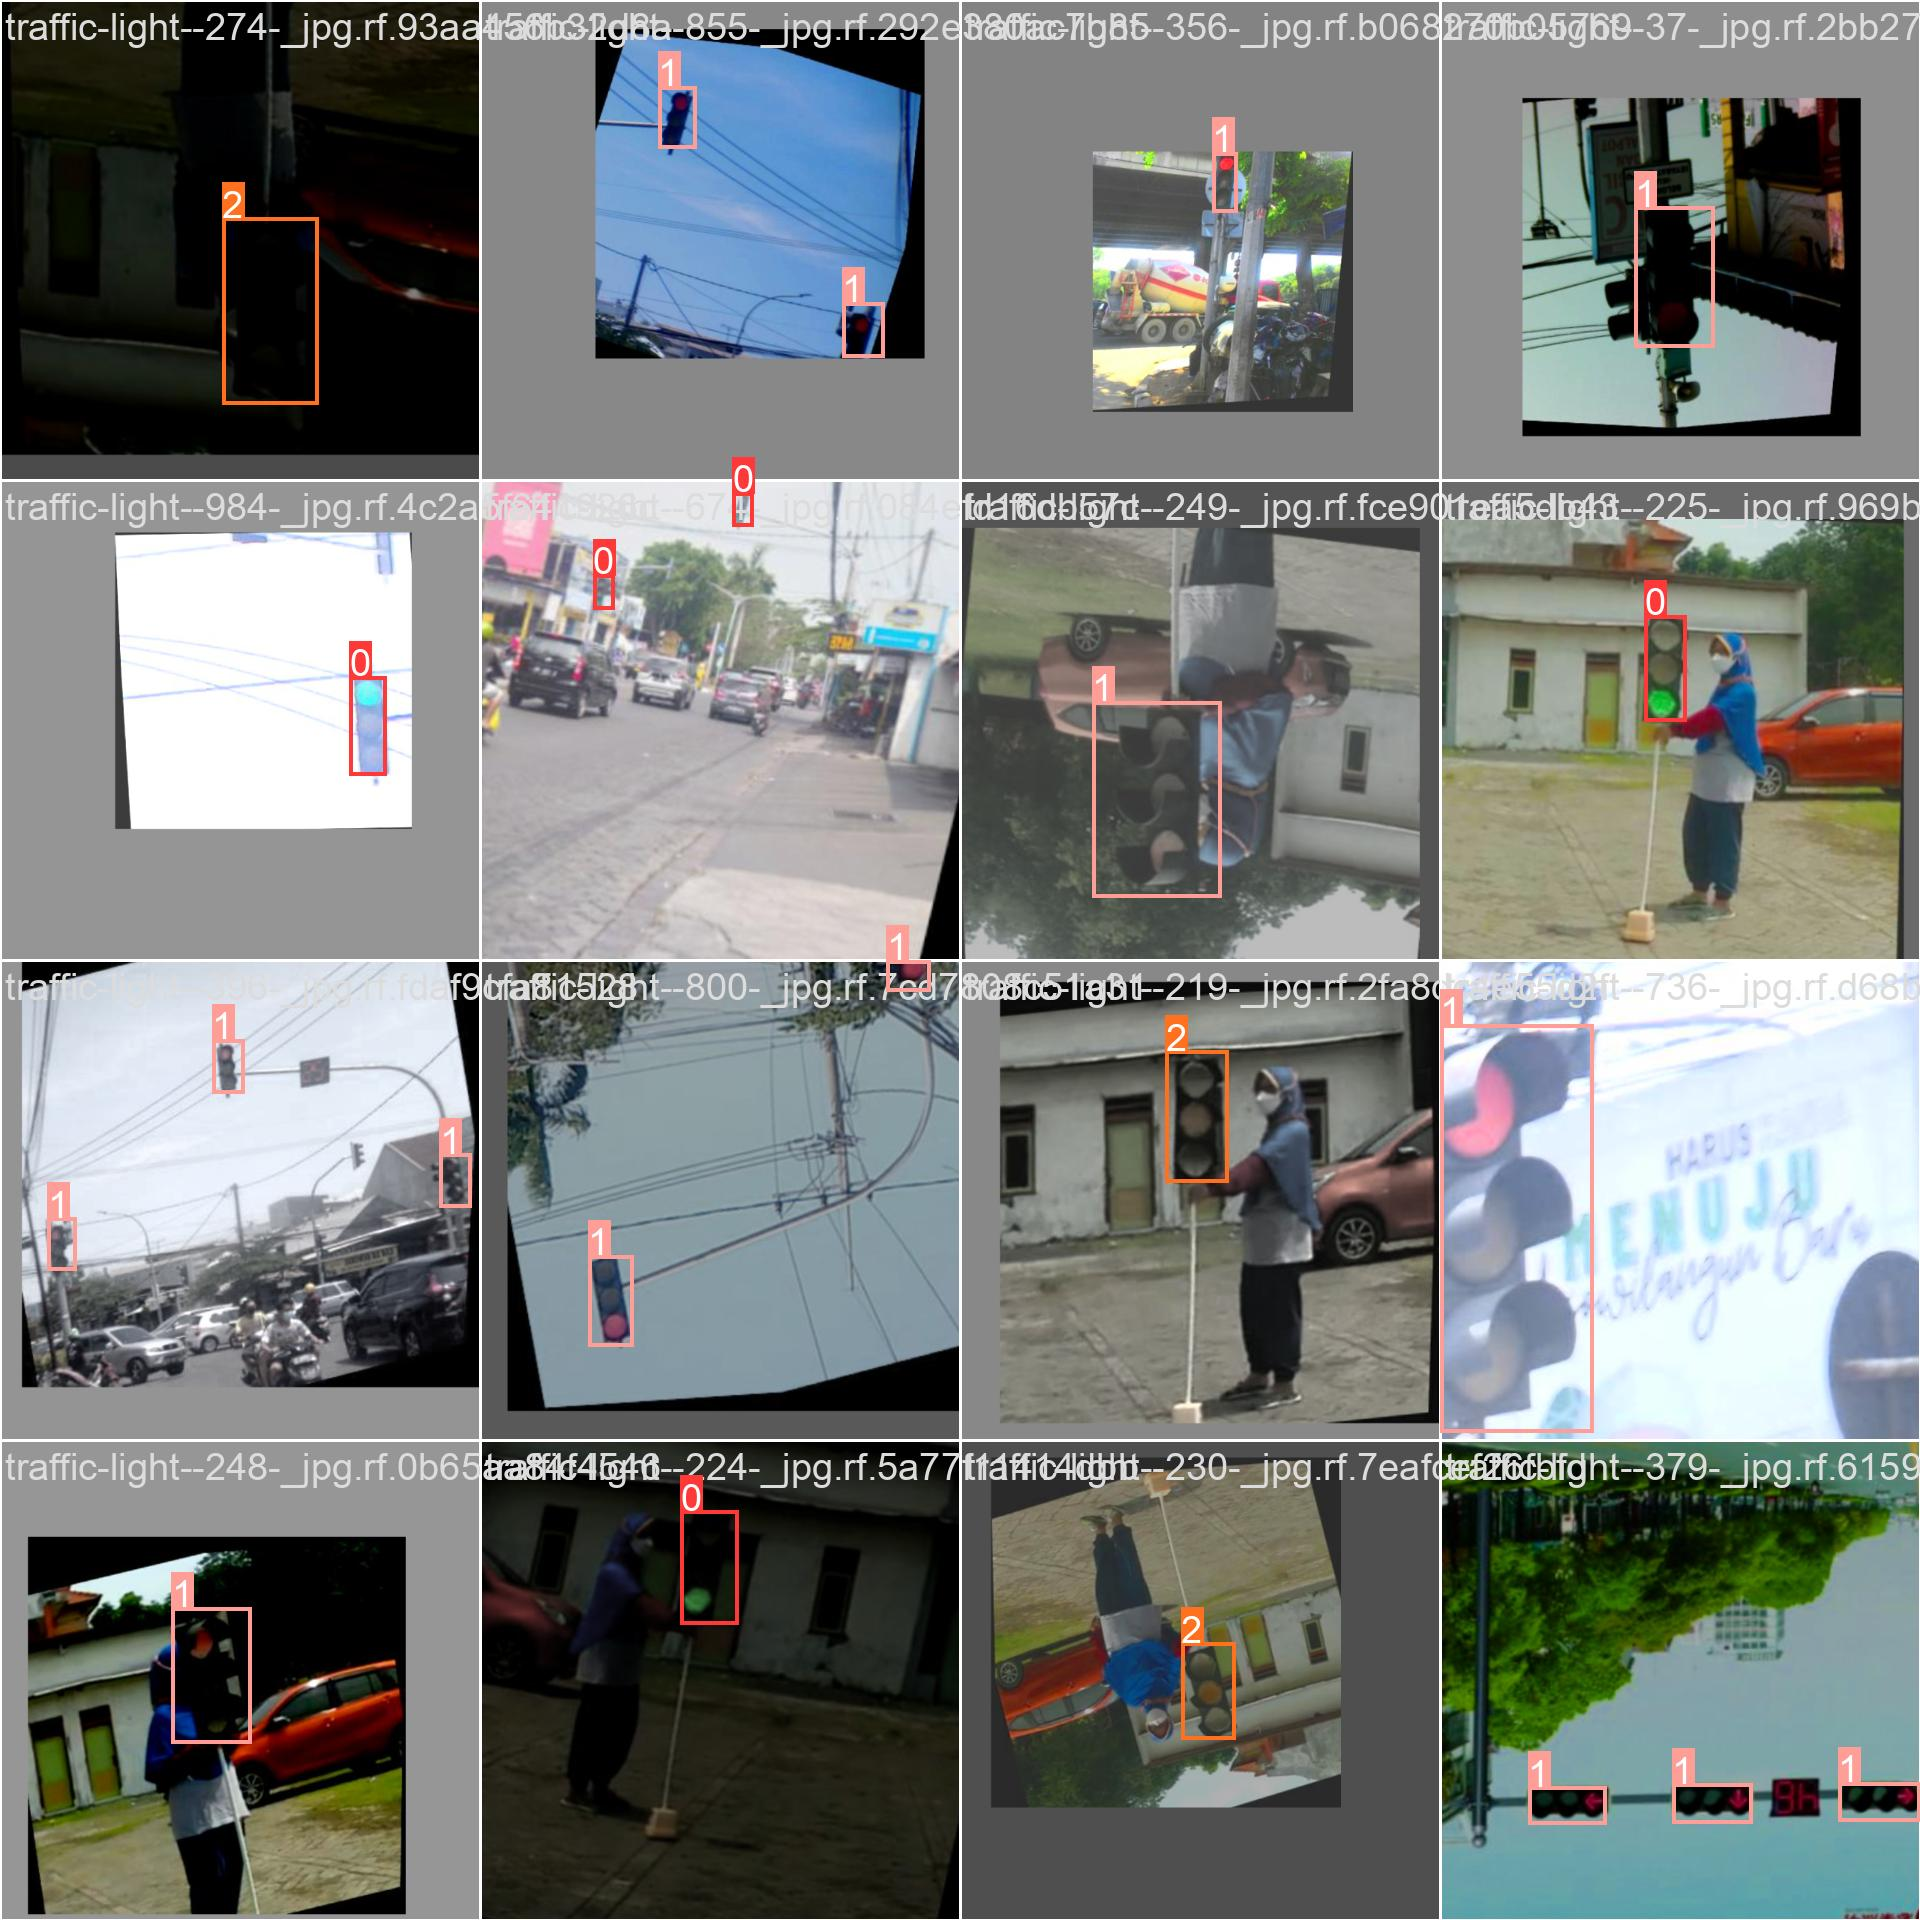

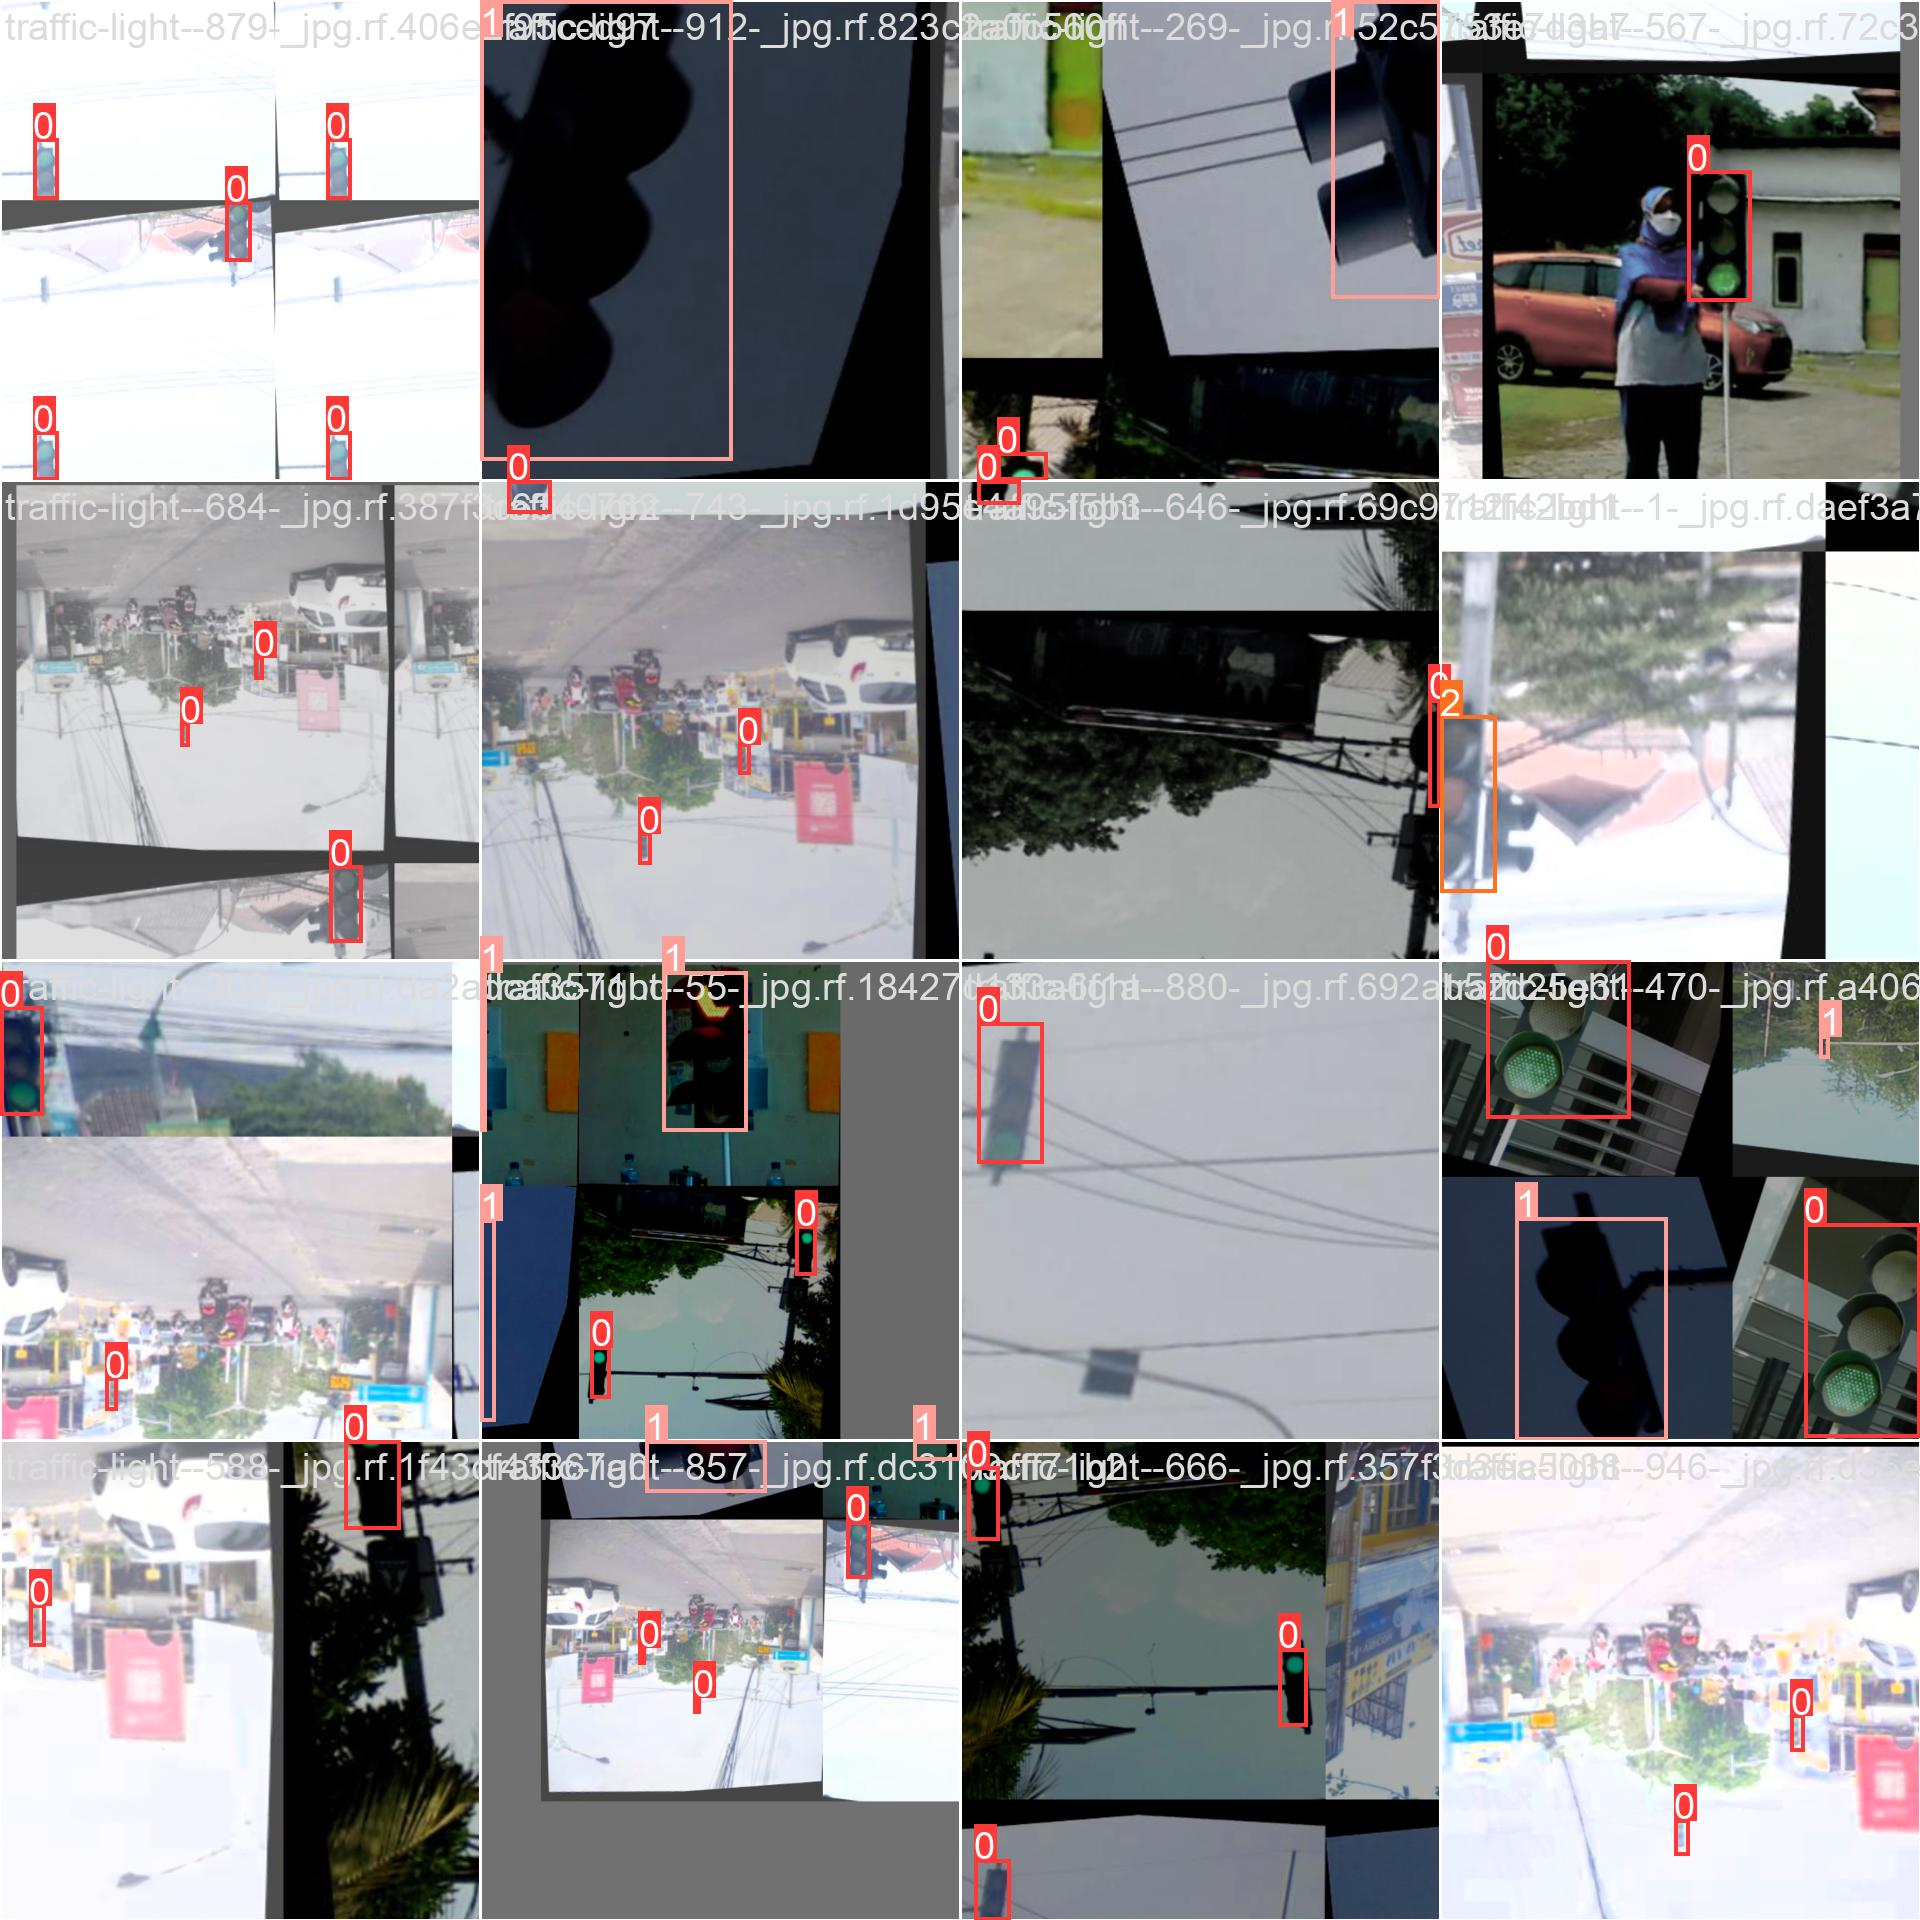

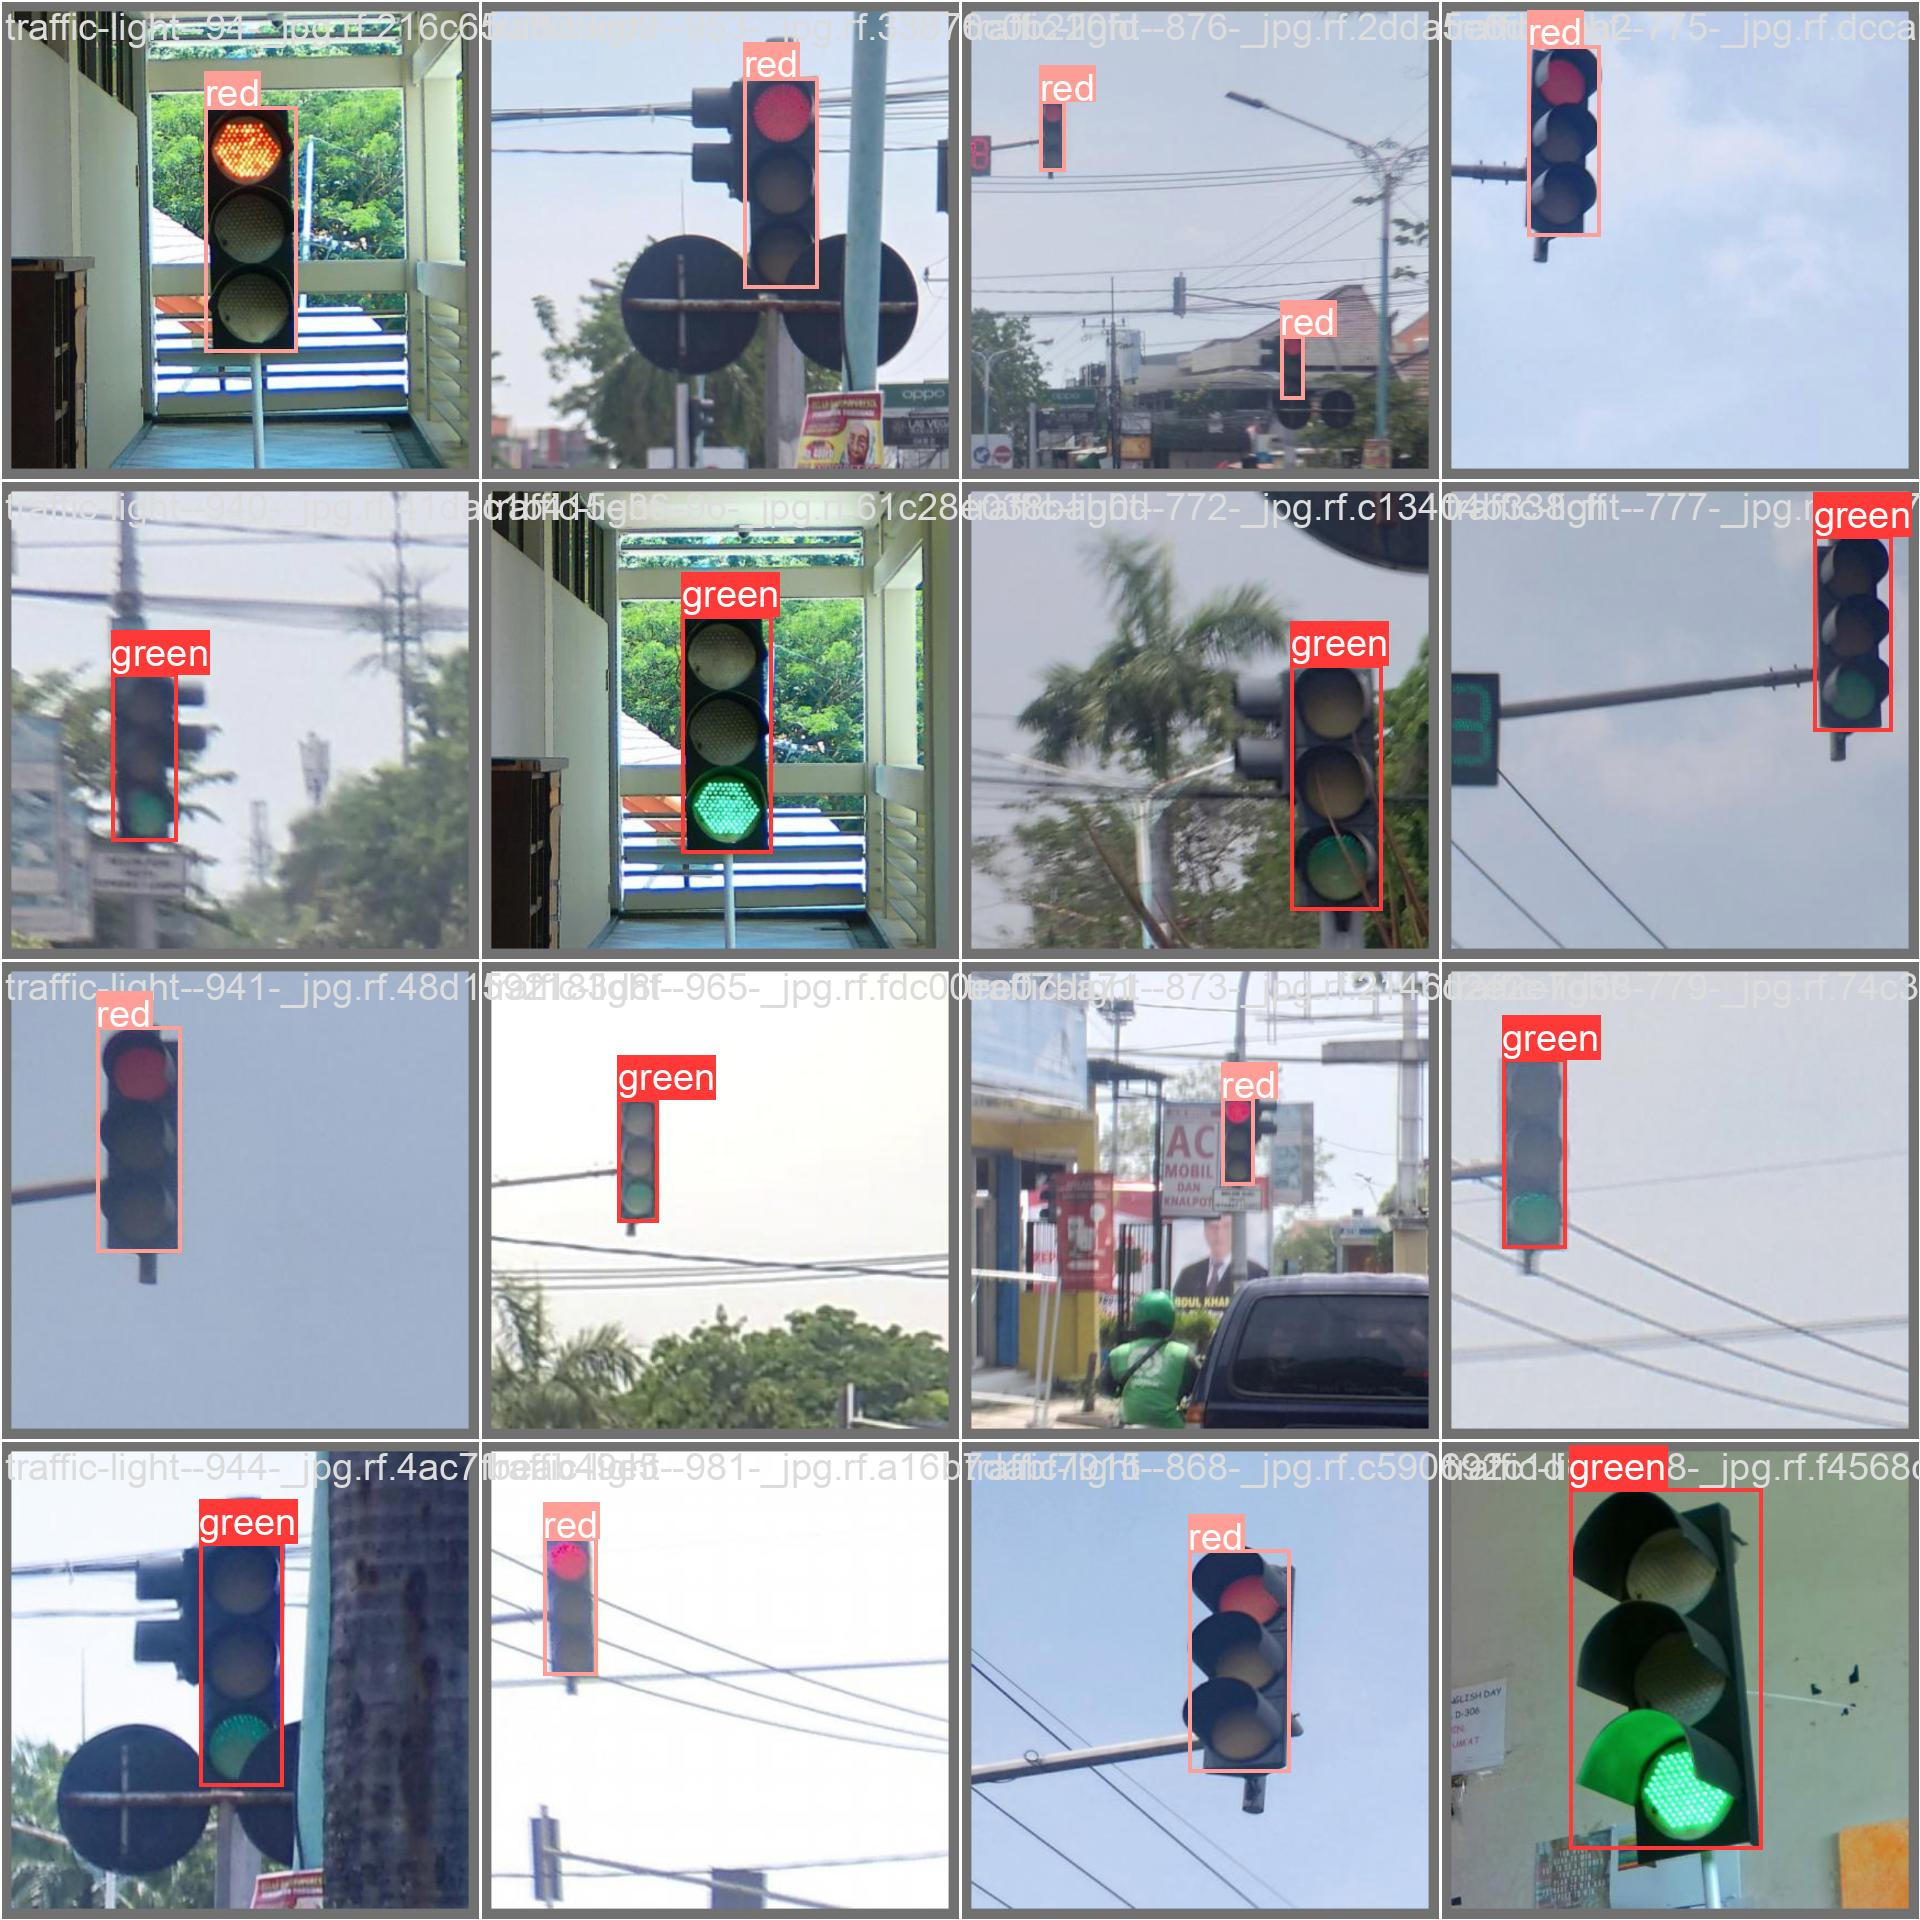

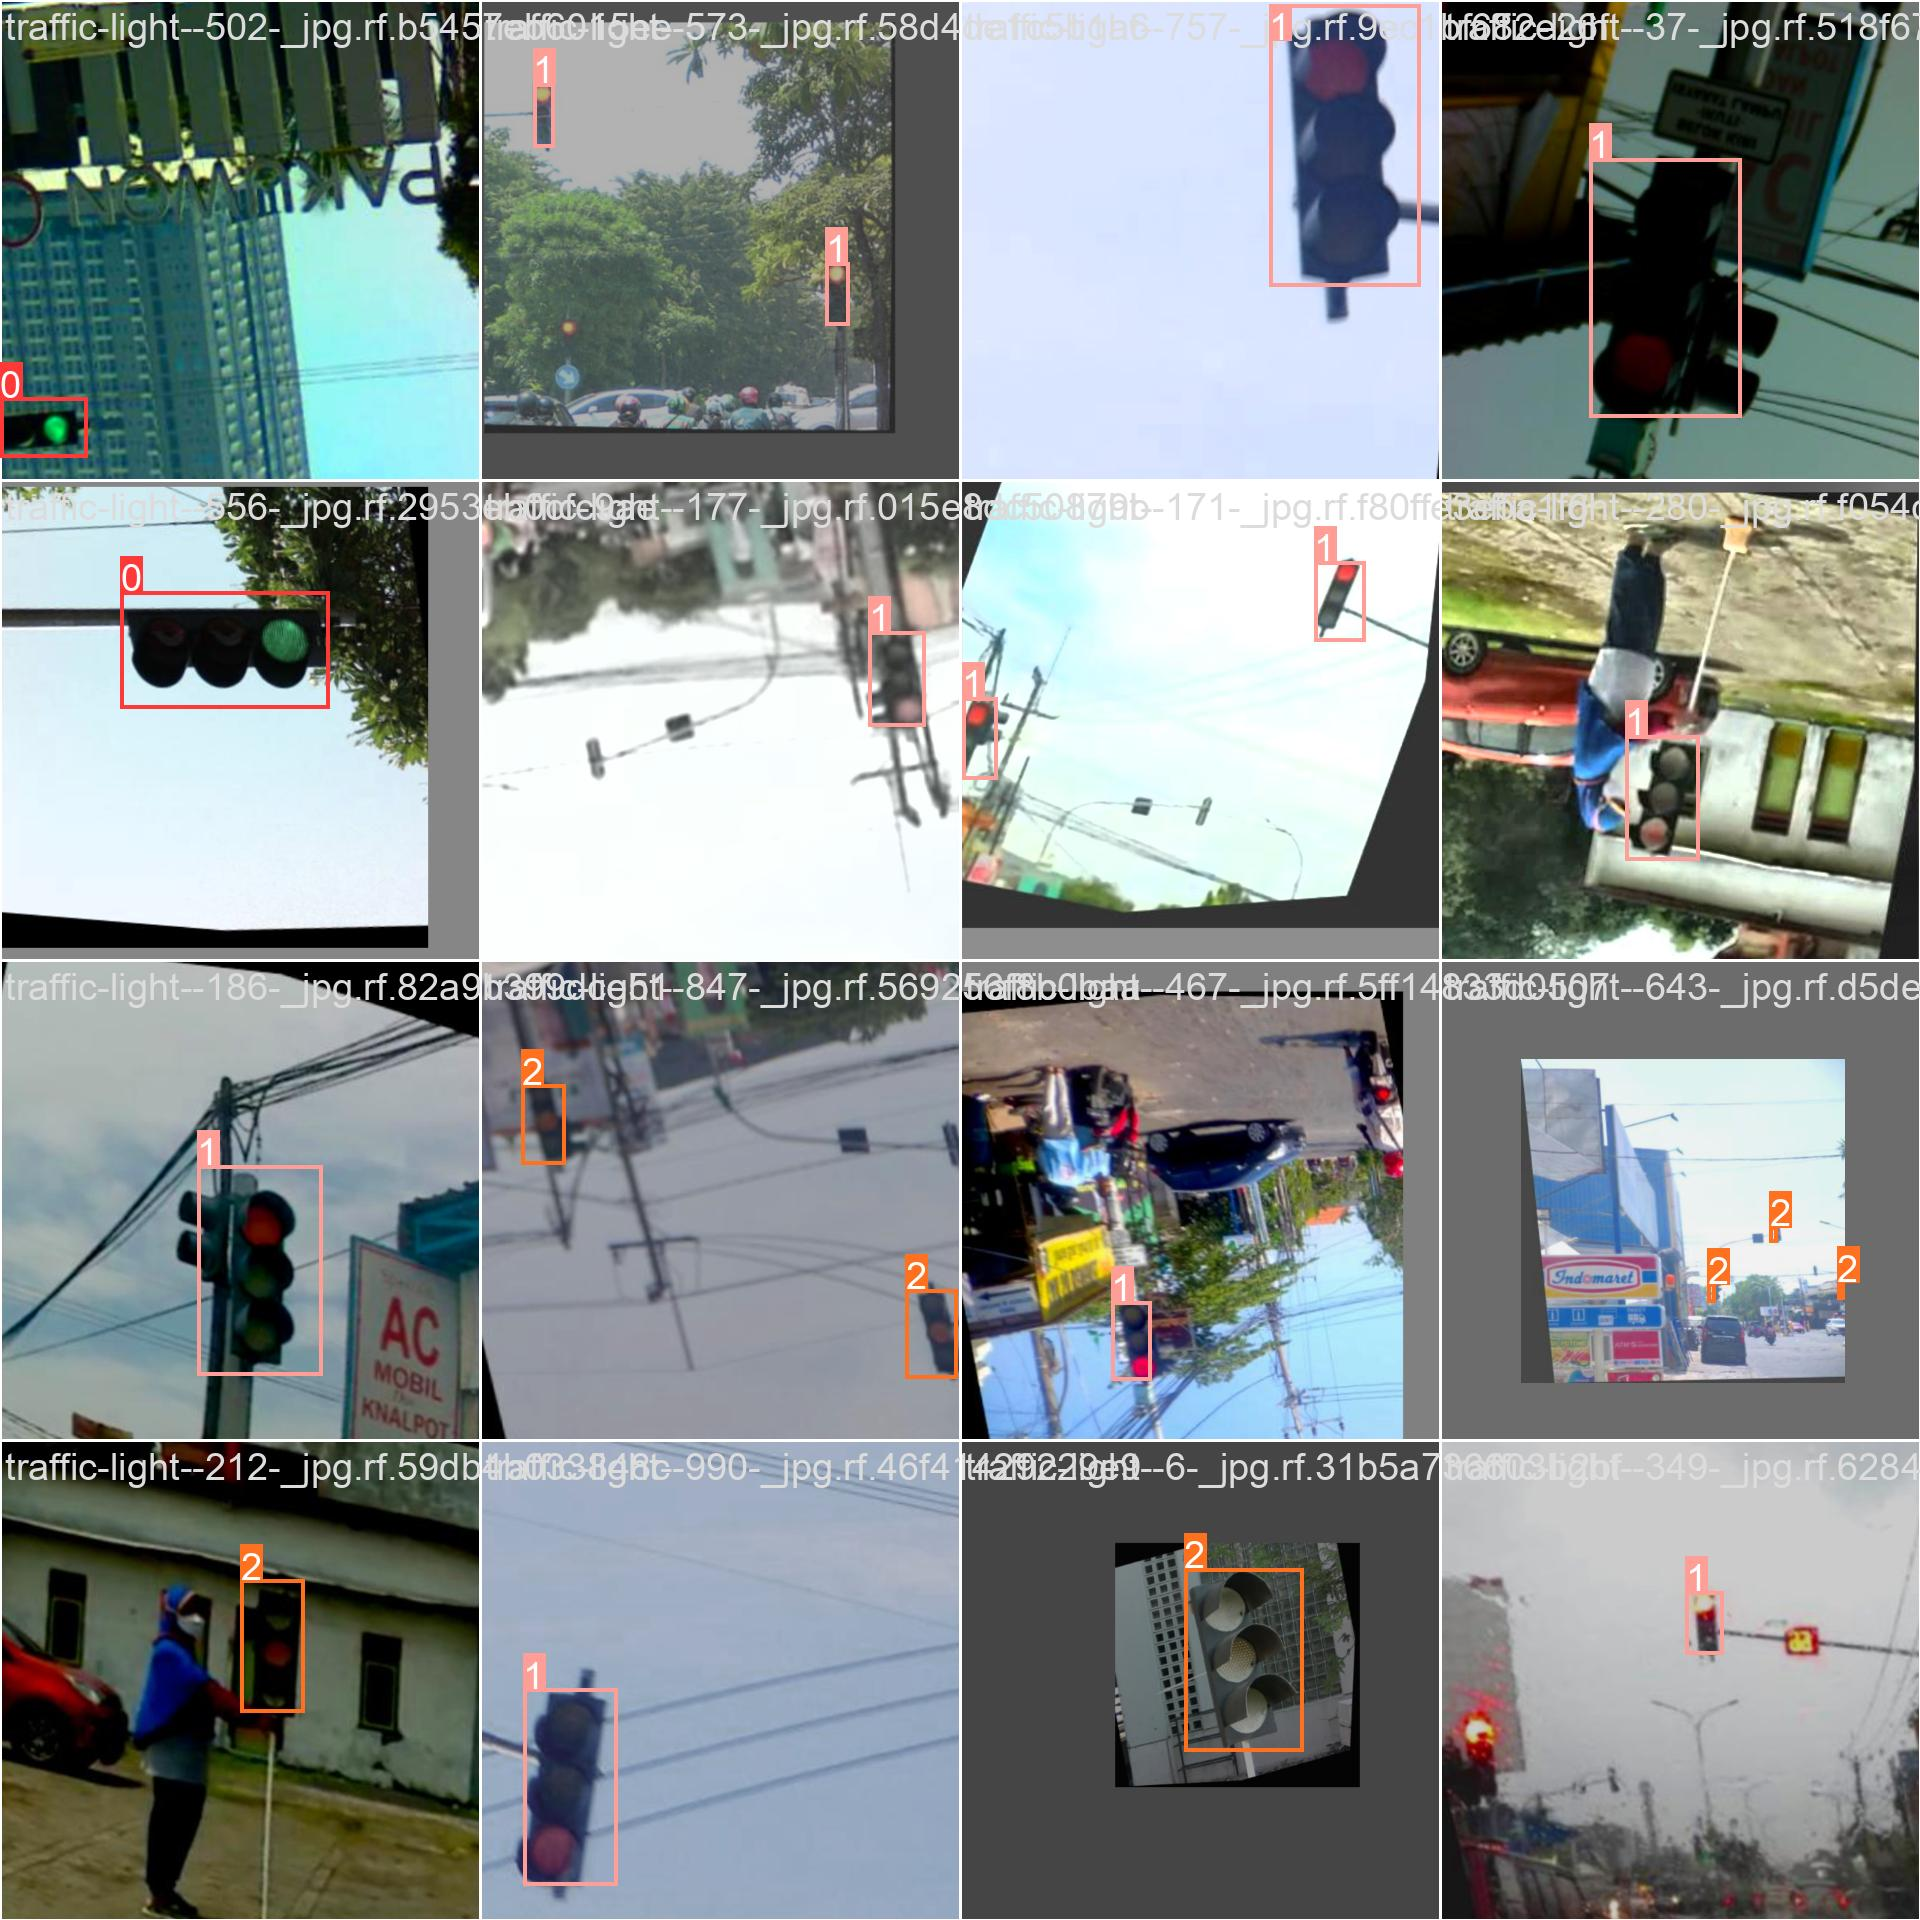

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/ultralytics/runs/detect/train4/*.jpg')[:5]:
  display(Image(filename=image_path, width=600))
  print("\n")

# Testing on a demo video

In [ ]:
# download a demo video
!gdown "https://drive.google.com/uc?id=1rCRcTpoLWxGi26gDdpnI-Nv6t2Ybi8rA&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1rCRcTpoLWxGi26gDdpnI-Nv6t2Ybi8rA&confirm=t
To: /content/ultralytics/ultralytics/models/yolo/detect/video1.mp4
100% 4.50M/4.50M [00:00<00:00, 39.6MB/s]


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model='/content/ultralytics/runs/detect/train4/weights/best.pt' source='/content/ultralytics/ultralytics/models/yolo/detect/video1.mp4' conf=0.45

/content/ultralytics/ultralytics/models/yolo/detect
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs

video 1/1 (1/183) /content/ultralytics/ultralytics/models/yolo/detect/video1.mp4: 384x640 (no detections), 203.9ms
video 1/1 (2/183) /content/ultralytics/ultralytics/models/yolo/detect/video1.mp4: 384x640 (no detections), 39.7ms
video 1/1 (3/183) /content/ultralytics/ultralytics/models/yolo/detect/video1.mp4: 384x640 (no detections), 39.7ms
video 1/1 (4/183) /content/ultralytics/ultralytics/models/yolo/detect/video1.mp4: 384x640 (no detections), 39.6ms
video 1/1 (5/183) /content/ultralytics/ultralytics/models/yolo/detect/video1.mp4: 384x640 (no detections), 39.6ms
video 1/1 (6/183) /content/ultralytics/ultralytics/models/yolo/detect/video1.mp4: 384x640 (no detections), 32.1ms
video 1/1 (7/183) /content/ultralytics/ultralytics/models/yolo/detect/video1.mp4: 384x640 (n